<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/ADMI_scoring/GeoMx_ADMI_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADM index scoring using scanpy's "score genes" code modified for bulk
# GeoMx data GSEXXXXXXXX

# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install numpy==1.22.4 pandas==1.5.3 matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [3]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libblkid1 libcairo-script-interpreter2
  libffi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev libmount1
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
The following packages will be upgr

In [4]:
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,356 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,260 kB]
Get:14 h

In [5]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [6]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 56 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 0s (13.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be

#Load font

In [1]:
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.font_manager as fm

In [2]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Bulk score ADM

In [ ]:
raw_counts = pd.read_csv('/content/drive/MyDrive/GeoMx_CIP/QC_BQC_FilTarget.csv', index_col=0)

In [ ]:
def bulk_score_ADM(
    bulk_data):

    # Normalize data: cpm --> log (base 2)+1 normalization
    bulk_data=bulk_data.applymap(pd.to_numeric)
    cpm_data = (+bulk_data/ np.sum(+bulk_data, axis=0)) * 1e6
    log_data = np.log2(cpm_data + 1)

    # Define ADMI gene list
    gene_list={
    'Prss3','Gm2663', '1810009J06Rik', 'Gm5771', 'Prss1','Gm4744','Gm10334',
    'Reg2', 'Reg3b', 'Reg3g','Reg3a',
    'Krt18','Krt8', 'Krt19', 'Clu',
    'Tspan1','Cldn4'}

    np.random.seed(0)

    # Determine which gene_list variables are present in input data
    gene_list_in_data = []
    genes_to_ignore = []
    for gene in gene_list:
        if gene in log_data.index:
            gene_list_in_data.append(gene)
        else:
            genes_to_ignore.append(gene)
    if len(genes_to_ignore) > 0:
        print(f'Warning: genes are not in data and ignored: {genes_to_ignore}')
    gene_list = set(gene_list_in_data[:])

    if len(gene_list) == 0:
        raise ValueError("No valid genes were passed for scoring.")

    # # Extract geen names
    # gene_pool = log_data.index.tolist()

    n_bins = 25

    # Seurat approach in scoring cells -- compare genes against random genes in a matched interval of expression.
    obs_avg = pd.Series(np.nanmean(log_data, axis=1), index=log_data.index) # matrix with average expression of genes across all samples
    n_items = int(np.round(len(obs_avg) / (n_bins - 1))) # number of items in each bin
    obs_cut = obs_avg.rank(method='min') // n_items # makes a pandas series denoting which bin each gene belongs to
    control_genes = set()

    # takes control_genes from each unique expression interval
    for cut in np.unique(obs_cut.loc[list(gene_list)]):
        r_genes = np.array(obs_cut[obs_cut == cut].index)
        np.random.shuffle(r_genes)
        ctrl_size = len(r_genes)
        control_genes.update(set(r_genes[:ctrl_size]))

    # Final gene lists
    control_genes = list(control_genes - gene_list)
    gene_list = list(gene_list)

    # Extract the expression values for the genes of interest
    X_list = log_data.loc[gene_list].values
    X_list = np.nanmean(X_list, axis=0, dtype='float64')

    # Extract the expression values for the control genes
    X_control = log_data.loc[control_genes].values
    X_control = np.nanmean(X_control, axis=0, dtype='float64')

    score = X_list - X_control

    # Create a new DataFrame with the column names of bulk_data as row names and the corresponding values from score as the only column
    score_df = pd.DataFrame(data=score, index=log_data.columns, columns=["scores"])
    return(score_df)

In [ ]:
df=bulk_score_ADM(raw_counts)

## plot

In [ ]:
df = df.reset_index(drop=False)

In [ ]:
# Reset the index and set the original index as a new column
df = df.reset_index(drop=False)
df = df.rename(columns={'index': 'Donor'})


In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/GeoMx_CIP/metadata_QC_BQC_FilTarget.csv')

In [ ]:
metadata

,Sample,CellType,Donor,Treatment,Slide
0,CIP_7d_TMA1,GeoMx,TMA1 026,CIP_7d,TMA1
1,CIP_7d_TMA1,GeoMx,TMA1 017,CIP_7d,TMA1
2,CIP_48hr_TMA1,GeoMx,TMA1 027,CIP_48hr,TMA1
3,C_UI_TMA1,GeoMx,TMA1 003,C_UI,TMA1
4,C_UI_TMA1,GeoMx,TMA1 002,C_UI,TMA1
5,CIP_3hr_TMA1,GeoMx,TMA1 004,CIP_3hr,TMA1
6,CIP_48hr_TMA2,GeoMx,TMA2 012,CIP_48hr,TMA2
7,CIP_24hr_TMA1,GeoMx,TMA1 009,CIP_24hr,TMA1
8,CIP_3hr_TMA2,GeoMx,TMA2 029,CIP_3hr,TMA2
9,CIP_12hr_TMA1,GeoMx,TMA1 005,CIP_12hr,TMA1


In [ ]:
metadata.set_index(metadata.columns[0], inplace=True)

In [ ]:
#Merge data on "sample names"
metadata = pd.DataFrame(metadata)

# replace period with space in 'Donor' column
metadata['Donor'] = metadata['Donor'].str.replace('.', ' ')

# merge dataframes on "donor" column
merged_df = pd.merge(metadata, df, on='Donor', how='outer')

<ipython-input-13-9c4065251505>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  metadata['Donor'] = metadata['Donor'].str.replace('.', ' ')


In [ ]:
merged_df

,CellType,Donor,Treatment,Slide,level_0,scores
0,GeoMx,TMA1 026,CIP_7d,TMA1,0,0.373737
1,GeoMx,TMA1 017,CIP_7d,TMA1,1,0.345056
2,GeoMx,TMA1 027,CIP_48hr,TMA1,2,1.813444
3,GeoMx,TMA1 003,C_UI,TMA1,3,-0.424692
4,GeoMx,TMA1 002,C_UI,TMA1,4,-0.257799
5,GeoMx,TMA1 004,CIP_3hr,TMA1,5,3.454528
6,GeoMx,TMA2 012,CIP_48hr,TMA2,6,2.078154
7,GeoMx,TMA1 009,CIP_24hr,TMA1,7,2.381636
8,GeoMx,TMA2 029,CIP_3hr,TMA2,8,3.025648
9,GeoMx,TMA1 005,CIP_12hr,TMA1,9,2.801111


In [ ]:
# specify the order of the categories
merged_df['Treatment'] = pd.Categorical(merged_df['Treatment'], categories=['C_UI', 'CIP_3hr', 'CIP_12hr','CIP_24hr','CIP_48hr','CIP_72hr','CIP_5d','CIP_7d','CIP_14d','CIP_30d'], ordered=True)


In [ ]:
# define a dictionary to map old names to new names
mapping = {'C_UI': 'Control', 'CIP_3hr': '3hr', 'CIP_12hr': '12hr',
           'CIP_24hr': '24hr', 'CIP_48hr': '48hr','CIP_72hr': '72hr','CIP_5d': '5day',
           'CIP_7d': '7day','CIP_14d': '14day','CIP_30d': '30day'}

# use the replace method to rename categories
merged_df['Treatment'] = merged_df['Treatment'].replace(mapping)


#plotting

In [ ]:
plt.rcParams['figure.dpi']=200

In [ ]:
fm.rcParams['font.family']=['Arial']

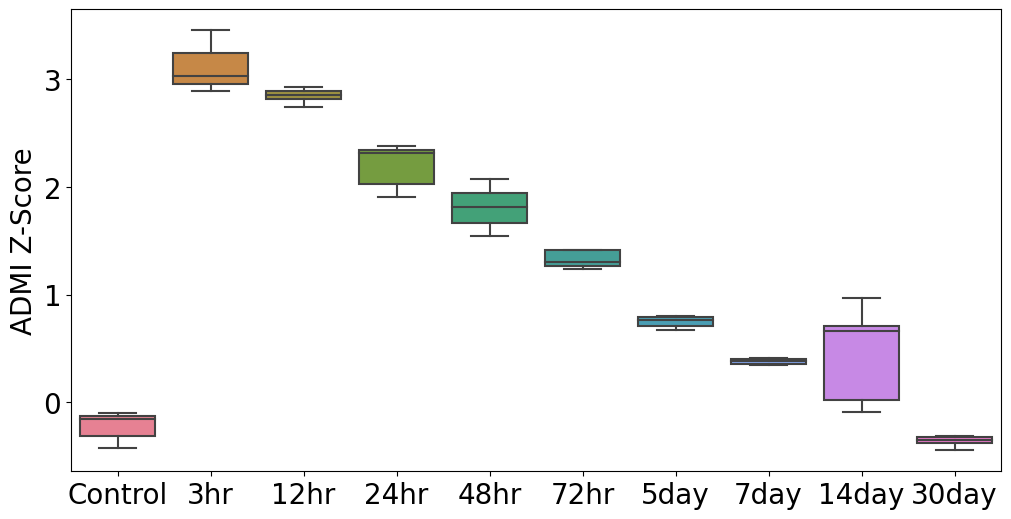

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

var = "Treatment"

# set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# get the number of unique treatment groups
num_treatment_groups = merged_df[var].nunique()

# create a custom color palette with enough colors for all treatment groups
custom_palette = sns.color_palette("husl", num_treatment_groups)

# create the boxplot using Seaborn with the custom color palette
sns.boxplot(x=var, y='scores', data=merged_df, showfliers=False, showmeans=False, ax=ax, palette=custom_palette)

# set the title and axis labels
ax.set_xlabel(var, fontsize=16)
ax.set_ylabel('ADMI Z-Score', fontsize=20)

# increase the size of the x and y tick labels
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('')
# plt.xticks(rotation=45)

# remove the vertical grid lines
ax.grid(axis='x', linewidth=0)

# show the plot
plt.show()


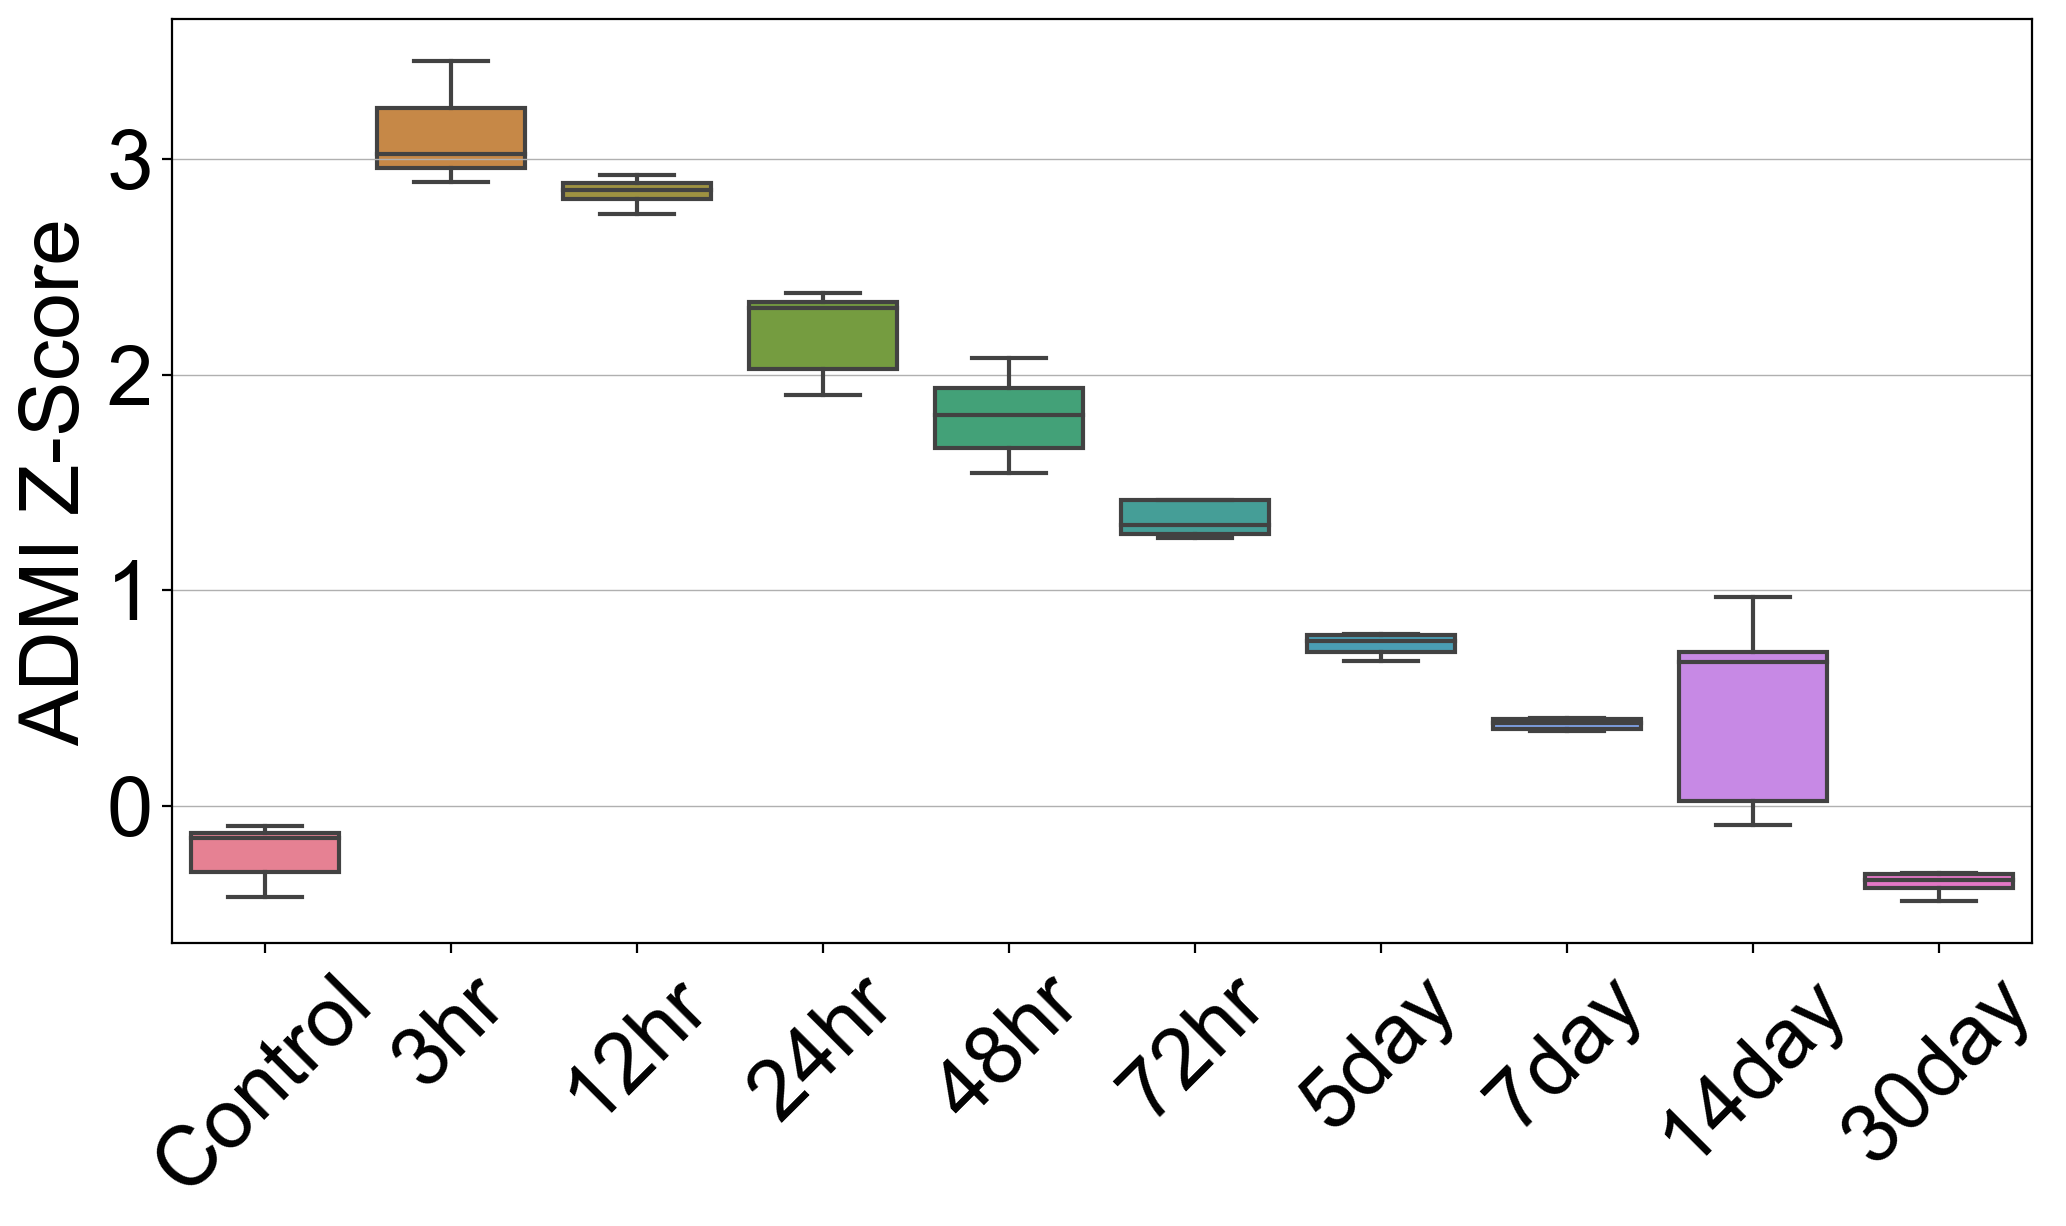

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

var = "Treatment"

# set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# get the number of unique treatment groups
num_treatment_groups = merged_df[var].nunique()

# create a custom color palette with enough colors for all treatment groups
custom_palette = sns.color_palette("husl", num_treatment_groups)

# create the boxplot using Seaborn with the custom color palette
sns.boxplot(x=var, y='scores', data=merged_df, showfliers=False, showmeans=False, ax=ax, palette=custom_palette)

# set the title and axis labels
ax.set_xlabel(var, fontsize=16)
ax.set_ylabel('ADMI Z-Score', fontsize=30)

# increase the size of the x and y tick labels
ax.tick_params(axis='both', labelsize=30)
ax.set_xlabel('')
plt.xticks(rotation=45)

# remove the vertical grid lines
ax.grid(axis='x', linewidth=0)
ax.grid(axis='y', linewidth=0.5)

# show the plot
plt.show()


#Statistics on scores

In [ ]:
# select rows with 'C_UI' or 'CIP_14day' in 'Treatment' column
mask = (merged_df['Treatment'] == 'CIP_14d')
subset_df = merged_df.loc[mask]

# create list of 'Scores' column for the selected rows
d14_score_list = list(subset_df['scores'])


In [ ]:
# select rows with 'C_UI' or 'CIP_14day' in 'Treatment' column
mask = (merged_df['Treatment'] == 'CIP_30d')
subset_df = merged_df.loc[mask]

# create list of 'Scores' column for the selected rows
d30_score_list = list(subset_df['scores'])


In [ ]:
# select rows with 'C_UI' or 'CIP_14day' in 'Treatment' column
mask = (merged_df['Treatment'] == 'C_UI')
subset_df = merged_df.loc[mask]

# create list of 'Scores' column for the selected rows
cont_score_list = list(subset_df['scores'])


In [ ]:
from scipy.stats import ttest_ind
import numpy as np


t, p_value = ttest_ind(d14_score_list,cont_score_list, equal_var=False)

print("t-value:", t)
print("p-value:", p_value)

t-value: 3.81819659879564
p-value: 0.006379396261321131


In [ ]:
from scipy.stats import ttest_ind
import numpy as np


t, p_value = ttest_ind(d30_score_list,cont_score_list, equal_var=False)

print("t-value:", t)
print("p-value:", p_value)

t-value: -2.0458323702459786
p-value: 0.06817665977714342
